#  Самостоятельная работа №8
## Разработка нейронной сети

## 1. Выбор базы данных и ее обработка
Я решил выбрать датасет CIFAR10 из keras.datasets. 

In [1]:
from tensorflow import keras as k
from tensorflow.keras.datasets import cifar10
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [3]:
test = x_train[0,:,:,:]
# Для наглядности построим пример тензора, который будет подаваться на вход нейронной сети
test = np.expand_dims(test, axis=0)
test.shape

(1, 32, 32, 3)

Теперь необходимо нормировать изображения в диапазон от 0 до 1:

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
# В качестве примера проверим третье изображение с одним каналом и получим значения интенсивности пикселей для этого каналла
x_train[2,:,:,1]

array([[1.        , 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.47058824, 0.4627451 , 0.43921569, ..., 0.31764706, 0.31372549,
        0.31372549],
       [0.4627451 , 0.43529412, 0.41568627, ..., 0.29411765, 0.29803922,
        0.32941176],
       [0.44313725, 0.41568627, 0.4       , ..., 0.33333333, 0.33333333,
        0.3372549 ]])

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Преобразуем признаки в категориальные для дальнейшей работы и корректности функции потерь (one-hot encoding):

In [7]:
y_train_cat = k.utils.to_categorical(y_train)
y_test_cat = k.utils.to_categorical(y_test)

## 2. Формирование архитектуры НС 

Используем Sequential из Keras:

In [8]:
model = k.Sequential([
    k.layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    k.layers.BatchNormalization(),  

    k.layers.Conv2D(32,(3,3), activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2,2), strides=1),

    k.layers.Dropout(0.3),

    k.layers.Conv2D(32,(3,3), activation='relu'),
    k.layers.BatchNormalization(),
    k.layers.MaxPooling2D(pool_size=(2,2), strides=1),
    k.layers.Dropout(0.3),

    k.layers.Flatten(),
    k.layers.Dense(256, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dropout(0.3),
    k.layers.Dense(10, activation='softmax')
])

C:\Users\shara\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['acc'])

# 3. Обучение нейронной сети

In [10]:
hist = model.fit(x_train, y_train_cat, validation_split=0.2, epochs=10)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 48ms/step - acc: 0.1495 - loss: 2.5320 - val_acc: 0.3346 - val_loss: 1.7464
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.2844 - loss: 1.8488 - val_acc: 0.3528 - val_loss: 1.8198
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.4202 - loss: 1.5752 - val_acc: 0.5292 - val_loss: 1.3621
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 48ms/step - acc: 0.5141 - loss: 1.3439 - val_acc: 0.5683 - val_loss: 1.2675
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.5831 - loss: 1.1985 - val_acc: 0.6122 - val_loss: 1.1058
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.6345 - loss: 1.0660 - val_acc: 0.6670 - val_loss: 0.9478
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.6668 - loss: 0.9766 - val_acc: 0.6822 - val_loss: 0.9144
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - acc: 0.6961 - loss: 0.8970 - val_acc: 0.6770 - val_loss: 1.0040
Epoch 9/10
1250/1250 ━━━

In [11]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.7041 - loss: 0.9151


[0.9336186647415161, 0.7002999782562256]

## 4. Визуализация результатов

In [12]:
hist.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 27, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,266,784 (54.42 MB)

 Trainable params: 4,755,530 (18.14 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 9,511,062 (36.28 MB)

In [13]:
import matplotlib.pyplot as plt

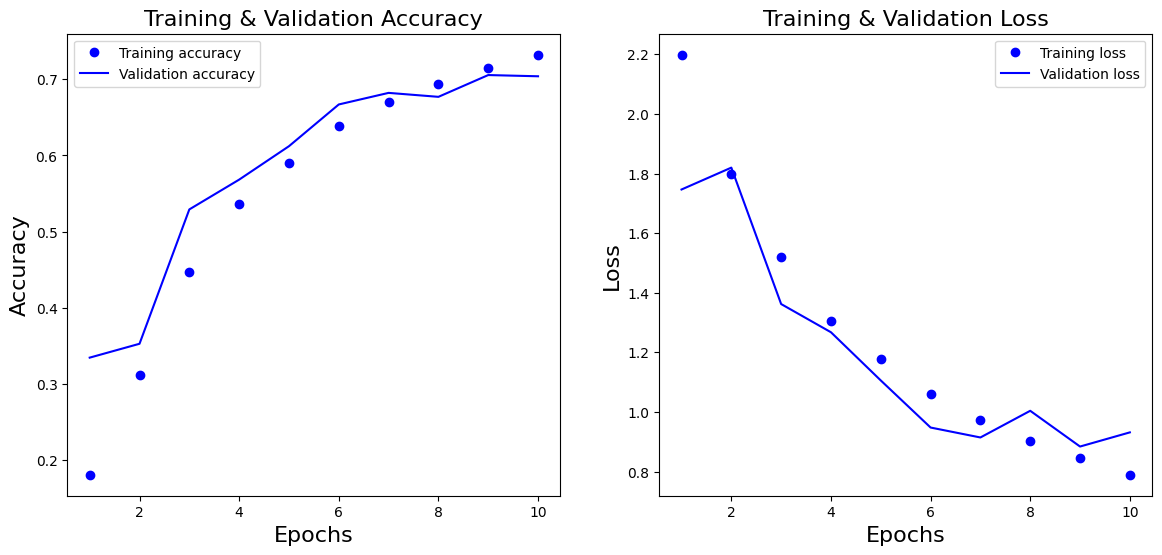

In [14]:
dict_ = hist.history
loss_values = dict_['loss']
val_loss_values = dict_['val_loss']
accuracy = dict_['acc']
val_accuracy = dict_['val_acc']

epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))


ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()


ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()
plt.show()